# Sentiment Analysis of Tweets During Refugees Crises

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords

from textblob import TextBlob

## Ukraine

In [2]:
ukr = pd.read_csv('tweets_refugees_ukraine.csv')
ukr.head()

Source           Target                       Date  \
0    UkrinformFra     UkrinformFra  2022-04-02 23:34:04+00:00   
1  BoomerKelly_TM  Only_rock_radio  2022-04-02 23:31:15+00:00   
2  BoomerKelly_TM  presspufferfish  2022-04-02 23:31:15+00:00   
3      3rdOutOf11       3rdOutOf11  2022-04-02 23:03:19+00:00   
4  therealwombat1         JoeBiden  2022-04-02 22:49:08+00:00   

                                             Content  \
0  GRETA : Les réfugiés ukrainiens en Europe peuv...   
1  @Only_rock_radio @presspufferfish Hi! #boomerk...   
2  @Only_rock_radio @presspufferfish Hi! #boomerk...   
3  #Ukraine #Refugees #UkraineRussia https://t.co...   
4  Well, I See It Took #Ukraine #Refugees To Make...   

                    Location  \
0                    Ukraine   
1  Downtown Los Angeles, CA.   
2  Downtown Los Angeles, CA.   
3                        NaN   
4              Phobos RESIST   

                                                 URL Type of Content  
0  https://twitter.com/UkrinformFra/status/151040...           Tweet  
1  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet  
2  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet  
3  https://twitter.com/3rdOutOf11/status/15103924...           Tweet  
4  https://twitter.com/therealwombat1/status/1510...       Non-Tweet

In [3]:
ukr.shape

(17481, 7)

In [4]:
stop = stopwords.words('english')
ukr['content_clean'] = ukr['Content'].str.replace(r"[^a-zA-Z\d\_]+", " ")
ukr['content_final'] = ukr['content_clean'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
ukr.head()

<ipython-input-4-ab0345a8074e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ukr['content_clean'] = ukr['Content'].str.replace(r"[^a-zA-Z\d\_]+", " ")


Source           Target                       Date  \
0    UkrinformFra     UkrinformFra  2022-04-02 23:34:04+00:00   
1  BoomerKelly_TM  Only_rock_radio  2022-04-02 23:31:15+00:00   
2  BoomerKelly_TM  presspufferfish  2022-04-02 23:31:15+00:00   
3      3rdOutOf11       3rdOutOf11  2022-04-02 23:03:19+00:00   
4  therealwombat1         JoeBiden  2022-04-02 22:49:08+00:00   

                                             Content  \
0  GRETA : Les réfugiés ukrainiens en Europe peuv...   
1  @Only_rock_radio @presspufferfish Hi! #boomerk...   
2  @Only_rock_radio @presspufferfish Hi! #boomerk...   
3  #Ukraine #Refugees #UkraineRussia https://t.co...   
4  Well, I See It Took #Ukraine #Refugees To Make...   

                    Location  \
0                    Ukraine   
1  Downtown Los Angeles, CA.   
2  Downtown Los Angeles, CA.   
3                        NaN   
4              Phobos RESIST   

                                                 URL Type of Content  \
0  https://twitter.com/UkrinformFra/status/151040...           Tweet   
1  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet   
2  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet   
3  https://twitter.com/3rdOutOf11/status/15103924...           Tweet   
4  https://twitter.com/therealwombat1/status/1510...       Non-Tweet   

                                       content_clean  \
0  GRETA Les r fugi s ukrainiens en Europe peuven...   
1   Only_rock_radio presspufferfish Hi boomerkell...   
2   Only_rock_radio presspufferfish Hi boomerkell...   
3   Ukraine Refugees UkraineRussia https t co AC8...   
4  Well I See It Took Ukraine Refugees To Make Jo...   

                                       content_final  
0  GRETA Les r fugi ukrainiens en Europe peuvent ...  
1  Only_rock_radio presspufferfish Hi boomerkelly...  
2  Only_rock_radio presspufferfish Hi boomerkelly...  
3  Ukraine Refugees UkraineRussia https co AC88ox...  
4  Well I See It Took Ukraine Refugees To Make Jo...

Polarity: Negative (-1) vs Positive (1) <br>
Subjectivity: Objective (0) vs Subjective (1)

In [5]:
ukr[['polarity', 'subjectivity']] = ukr['content_final'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
ukr.head()

Source           Target                       Date  \
0    UkrinformFra     UkrinformFra  2022-04-02 23:34:04+00:00   
1  BoomerKelly_TM  Only_rock_radio  2022-04-02 23:31:15+00:00   
2  BoomerKelly_TM  presspufferfish  2022-04-02 23:31:15+00:00   
3      3rdOutOf11       3rdOutOf11  2022-04-02 23:03:19+00:00   
4  therealwombat1         JoeBiden  2022-04-02 22:49:08+00:00   

                                             Content  \
0  GRETA : Les réfugiés ukrainiens en Europe peuv...   
1  @Only_rock_radio @presspufferfish Hi! #boomerk...   
2  @Only_rock_radio @presspufferfish Hi! #boomerk...   
3  #Ukraine #Refugees #UkraineRussia https://t.co...   
4  Well, I See It Took #Ukraine #Refugees To Make...   

                    Location  \
0                    Ukraine   
1  Downtown Los Angeles, CA.   
2  Downtown Los Angeles, CA.   
3                        NaN   
4              Phobos RESIST   

                                                 URL Type of Content  \
0  https://twitter.com/UkrinformFra/status/151040...           Tweet   
1  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet   
2  https://twitter.com/BoomerKelly_TM/status/1510...       Non-Tweet   
3  https://twitter.com/3rdOutOf11/status/15103924...           Tweet   
4  https://twitter.com/therealwombat1/status/1510...       Non-Tweet   

                                       content_clean  \
0  GRETA Les r fugi s ukrainiens en Europe peuven...   
1   Only_rock_radio presspufferfish Hi boomerkell...   
2   Only_rock_radio presspufferfish Hi boomerkell...   
3   Ukraine Refugees UkraineRussia https t co AC8...   
4  Well I See It Took Ukraine Refugees To Make Jo...   

                                       content_final  polarity  subjectivity  
0  GRETA Les r fugi ukrainiens en Europe peuvent ...  0.000000      0.000000  
1  Only_rock_radio presspufferfish Hi boomerkelly...  0.047273      0.150909  
2  Only_rock_radio presspufferfish Hi boomerkelly...  0.047273      0.150909  
3  Ukraine Refugees UkraineRussia https co AC88ox...  0.000000      0.000000  
4  Well I See It Took Ukraine Refugees To Make Jo...  0.000000      0.000000

In [6]:
ukr['polarity'].describe()

count    17481.000000
mean         0.072513
std          0.238957
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.166667
max          1.000000
Name: polarity, dtype: float64

In [7]:
ukr[(ukr['polarity'] == 1)]['content_final'].count() / len(ukr.polarity)

0.002860248269549797

In [8]:
ukr['subjectivity'].describe()

count    17481.000000
mean         0.285157
std          0.304806
min          0.000000
25%          0.000000
50%          0.216667
75%          0.500000
max          1.000000
Name: subjectivity, dtype: float64

In [9]:
ukr[(ukr['subjectivity'] == 1)]['content_final'].count() / len(ukr.subjectivity)

0.03083347634574681

## Syria

In [10]:
syr = pd.read_csv('tweets_refugees_syria.csv')
syr.head()

Source          Target                       Date  \
0   Starseed52      _TradeFair  2015-10-02 22:59:50+00:00   
1  ErieGayNews     ORAMrefugee  2015-10-02 22:55:07+00:00   
2    BCGovNews  redcrosscanada  2015-10-02 22:45:57+00:00   
3     pontosen        pontosen  2015-10-02 22:35:07+00:00   
4  reFocusZone     reFocusZone  2015-10-02 22:17:01+00:00   

                                             Content  \
0  @_TradeFair Keep speaking #TruthToPower #Power...   
1  @ORAMrefugee CNN Opinion:  'U.S. Must Welcome ...   
2  BCers can support @redcrosscanada relief effor...   
3  #Assad is he the only viable solution for peac...   
4  Migrant rape and sex-slavery epidemic in #Germ...   

                   Location  \
0                       NaN   
1                   Erie PA   
2  British Columbia, Canada   
3                       NaN   
4   EU | Merica | Coram Deo   

                                                 URL Type of Content  
0  https://twitter.com/Starseed52/status/65008279...       Non-Tweet  
1  https://twitter.com/ErieGayNews/status/6500816...       Non-Tweet  
2  https://twitter.com/BCGovNews/status/650079300...       Non-Tweet  
3  https://twitter.com/pontosen/status/6500765749...           Tweet  
4  https://twitter.com/reFocusZone/status/6500720...           Tweet

In [11]:
syr.shape

(15115, 7)

In [12]:
stop = stopwords.words('english')
syr['content_clean'] = syr['Content'].str.replace(r"[^a-zA-Z\d\_]+", " ")
syr['content_final'] = syr['content_clean'].apply(lambda x: " ".join([word for word in x.split() if word not in (stop)]))
syr.head()

<ipython-input-12-c48d8bc231df>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  syr['content_clean'] = syr['Content'].str.replace(r"[^a-zA-Z\d\_]+", " ")


Source          Target                       Date  \
0   Starseed52      _TradeFair  2015-10-02 22:59:50+00:00   
1  ErieGayNews     ORAMrefugee  2015-10-02 22:55:07+00:00   
2    BCGovNews  redcrosscanada  2015-10-02 22:45:57+00:00   
3     pontosen        pontosen  2015-10-02 22:35:07+00:00   
4  reFocusZone     reFocusZone  2015-10-02 22:17:01+00:00   

                                             Content  \
0  @_TradeFair Keep speaking #TruthToPower #Power...   
1  @ORAMrefugee CNN Opinion:  'U.S. Must Welcome ...   
2  BCers can support @redcrosscanada relief effor...   
3  #Assad is he the only viable solution for peac...   
4  Migrant rape and sex-slavery epidemic in #Germ...   

                   Location  \
0                       NaN   
1                   Erie PA   
2  British Columbia, Canada   
3                       NaN   
4   EU | Merica | Coram Deo   

                                                 URL Type of Content  \
0  https://twitter.com/Starseed52/status/65008279...       Non-Tweet   
1  https://twitter.com/ErieGayNews/status/6500816...       Non-Tweet   
2  https://twitter.com/BCGovNews/status/650079300...       Non-Tweet   
3  https://twitter.com/pontosen/status/6500765749...           Tweet   
4  https://twitter.com/reFocusZone/status/6500720...           Tweet   

                                       content_clean  \
0   _TradeFair Keep speaking TruthToPower PowerTo...   
1   ORAMrefugee CNN Opinion U S Must Welcome Syri...   
2  BCers can support redcrosscanada relief effort...   
3   Assad is he the only viable solution for peac...   
4  Migrant rape and sex slavery epidemic in Germa...   

                                       content_final  
0  _TradeFair Keep speaking TruthToPower PowerToT...  
1  ORAMrefugee CNN Opinion U S Must Welcome Syria...  
2  BCers support redcrosscanada relief efforts Sy...  
3  Assad viable solution peace Syria properly alt...  
4  Migrant rape sex slavery epidemic Germany Send...

Polarity: Negative (-1) vs Positive (1) <br>
Subjectivity: Objective (0) vs Subjective (1)

In [13]:
syr[['polarity', 'subjectivity']] = syr['content_final'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
syr.head()

Source          Target                       Date  \
0   Starseed52      _TradeFair  2015-10-02 22:59:50+00:00   
1  ErieGayNews     ORAMrefugee  2015-10-02 22:55:07+00:00   
2    BCGovNews  redcrosscanada  2015-10-02 22:45:57+00:00   
3     pontosen        pontosen  2015-10-02 22:35:07+00:00   
4  reFocusZone     reFocusZone  2015-10-02 22:17:01+00:00   

                                             Content  \
0  @_TradeFair Keep speaking #TruthToPower #Power...   
1  @ORAMrefugee CNN Opinion:  'U.S. Must Welcome ...   
2  BCers can support @redcrosscanada relief effor...   
3  #Assad is he the only viable solution for peac...   
4  Migrant rape and sex-slavery epidemic in #Germ...   

                   Location  \
0                       NaN   
1                   Erie PA   
2  British Columbia, Canada   
3                       NaN   
4   EU | Merica | Coram Deo   

                                                 URL Type of Content  \
0  https://twitter.com/Starseed52/status/65008279...       Non-Tweet   
1  https://twitter.com/ErieGayNews/status/6500816...       Non-Tweet   
2  https://twitter.com/BCGovNews/status/650079300...       Non-Tweet   
3  https://twitter.com/pontosen/status/6500765749...           Tweet   
4  https://twitter.com/reFocusZone/status/6500720...           Tweet   

                                       content_clean  \
0   _TradeFair Keep speaking TruthToPower PowerTo...   
1   ORAMrefugee CNN Opinion U S Must Welcome Syri...   
2  BCers can support redcrosscanada relief effort...   
3   Assad is he the only viable solution for peac...   
4  Migrant rape and sex slavery epidemic in Germa...   

                                       content_final  polarity  subjectivity  
0  _TradeFair Keep speaking TruthToPower PowerToT...       0.0           0.0  
1  ORAMrefugee CNN Opinion U S Must Welcome Syria...       0.8           0.9  
2  BCers support redcrosscanada relief efforts Sy...       0.0           0.0  
3  Assad viable solution peace Syria properly alt...       0.0           0.1  
4  Migrant rape sex slavery epidemic Germany Send...       0.0           0.0

In [14]:
syr['polarity'].describe()

count    15115.000000
mean         0.026274
std          0.239515
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: polarity, dtype: float64

In [15]:
syr[(syr['polarity'] == 1)]['content_final'].count() / len(syr.polarity)

0.0026463777704267286

In [16]:
syr['subjectivity'].describe()

count    15115.000000
mean         0.202699
std          0.298388
min          0.000000
25%          0.000000
50%          0.000000
75%          0.428571
max          1.000000
Name: subjectivity, dtype: float64

In [17]:
syr[(syr['subjectivity'] == 1)]['content_final'].count() / len(syr.subjectivity)

0.03261660602050943

## Results Discussion
Tweets examined from both datasets show approximately the same sentiments with a very small yet significant difference.

## Plots

In [18]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px
from wordcloud import WordCloud

In [19]:
# polarity
fig = px.histogram(ukr, x='polarity', nbins=10, histnorm='percent')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)', marker_line_width=0)
fig.update_layout(title_text='Ukraine Refugees - Tweets Polarity')
fig.show()

In [20]:
# subjectivity
fig = px.histogram(ukr, x='subjectivity', nbins=10, histnorm='percent')
fig.update_traces(marker_color="blue",marker_line_color='rgb(8,48,107)', marker_line_width=0)
fig.update_layout(title_text='Ukraine Refugees - Tweets Subjectivity')
fig.show()

In [21]:
# polarity
fig = px.histogram(syr, x='polarity', nbins=10, histnorm='percent')
fig.update_traces(marker_color="orange",marker_line_color='rgb(8,48,107)', marker_line_width=0)
fig.update_layout(title_text='Syria Refugees - Tweets Polarity')
fig.show()

In [22]:
# subjectivity
fig = px.histogram(syr, x='subjectivity', nbins=10, histnorm='percent')
fig.update_traces(marker_color="red",marker_line_color='rgb(8,48,107)', marker_line_width=0)
fig.update_layout(title_text='Syria Refugees - Tweets Subjectivity')
fig.show()

## Wordclouds

In [23]:
def wordclouder(df):
    textt = " ".join(tweet for tweet in df.content_final)
    wordcloud_ = WordCloud(stopwords=stop).generate(textt)

    plt.imshow(wordcloud_, interpolation='bilinear')
    plt.axis("off")
    plt.savefig('wordcloud11.png')
    plt.show()

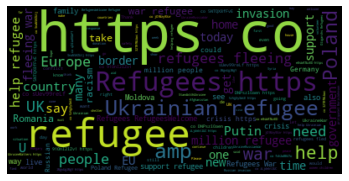

In [24]:
newStopWords = ['Ukraine', 'Russia']
stop.extend(newStopWords)
wordclouder(ukr)

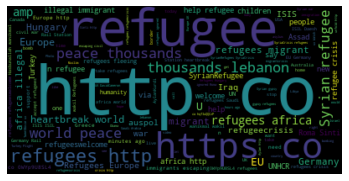

In [25]:
newStopWords = ['Syria']
stop.extend(newStopWords)
wordclouder(syr)